# matplotlib + numpy + cartopy

*notebook by Maureen Ahiataku and Leif Denby*

`cartopy` is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps. To put geographical regions on the map `cartopy` includes at set of "features" (such as country boundaries, ocean, etc), but it is also possible to load your own regions using so-called "shape-files". These can be loaded with the `shapereader` function inside of `cartopy.io`.

Coordinate reference systems (CRS) are available in cartopy as `cartopy.crs` (and are inherited from proj4).

https://scitools.org.uk/cartopy/docs/latest/ 


<b> Objectives </b>
1. Read data from csv file to generate map using cartopy and add features such as land, lake, ocean etc.

2. Load a shapefile into cartopy maps

3. Use the default cartopy shapefiles

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader

from pathlib import Path

<IPython.core.display.Javascript object>

In [3]:
data_path = Path("../data")

<IPython.core.display.Javascript object>

# Plotting values at stations on a map

We will here create a plot where we can see for 22 synoptic weather stations across Ghana what the annual daily maximum rainfall (ADM) was for 2019. In addition we will be adding the adding the borders of administrative regions in Ghana.

In [4]:
drr = np.genfromtxt(data_path / "2019_ADM_rr.csv", delimiter=",", skip_header=1)

stn = drr[:, 0]
lat = drr[:, 1]
lon = drr[:, 2]
rr = drr[:, 3]

<IPython.core.display.Javascript object>

In [5]:
lat

array([10.9   , 10.05  ,  9.5539,  9.45  ,  9.0333,  7.8167,  7.75  ,
        7.3592,  6.72  ,  6.68  ,  6.6   ,  6.1965,  6.12  ,  6.1   ,
        6.08  ,  5.9293,  5.7777,  5.6334,  5.6   ,  5.2   ,  4.8935,
        4.8667])

<IPython.core.display.Javascript object>

next we use `shapereader` to read in the "shape-file" for Ghana's administrative regions

In [6]:
shp_path = data_path / "GHA_adm_shp/gh_wgs16dregions/gh_wgs16dregions.shp"
adm1_shapes = list(shapereader.Reader(str(shp_path)).geometries())

<IPython.core.display.Javascript object>

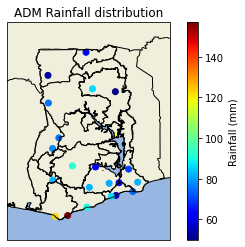

<IPython.core.display.Javascript object>

In [7]:
fig = plt.figure()
# create axes with specific proojection
ax = plt.axes(projection=ccrs.PlateCarree())
# set the domain lat lon extent
ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())

# add the administrative borders from the shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)
# and add country borders, ocean, land and lake borders from cartopy's set of features
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cf.LAKES, edgecolor='black')

splot = ax.scatter(lon,lat,c=rr, cmap=cm.jet, alpha=1)
ax.set(title='ADM Rainfall distribution')
fig.colorbar(splot,label="Rainfall (mm)", orientation="vertical")


To set the station data in a wider context we will next be plotting a gridded dataset which is produced from GMET and the TAHMO (TAHMO Tropical Hydro-Meteorological Observatory data) observations stations. This gridded data is stored in at CSV file where the first columns are the latitutde and longitude, and the third column the precipitation the total rainfall for one week in March 2021.

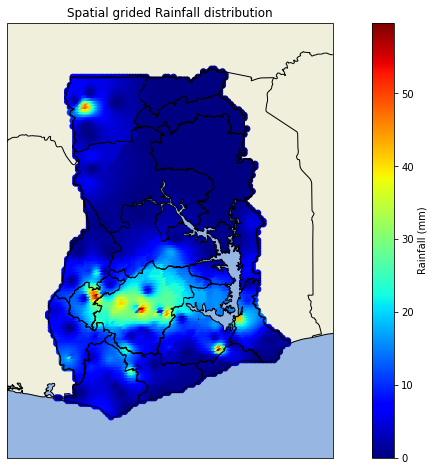

<IPython.core.display.Javascript object>

In [8]:
# read data

TA_rr = np.genfromtxt(
    data_path / "tahmo_1_7_Mar_2021_rr.csv", delimiter=",", skip_header=1
)
latt = TA_rr[:, 0:1]
lont = TA_rr[:, 1:2]
rrt = TA_rr[:, 2:3]

fig = plt.figure(figsize=(14, 8))
# set the cartopy projection
ax = fig.add_subplot(projection=ccrs.PlateCarree())
# set the domain based on the lon lat
ax.set_extent([-4, 2, 4, 12], ccrs.PlateCarree())

# this add the countries borders and shapefile
ax.add_geometries(
    adm1_shapes, ccrs.PlateCarree(), edgecolor="black", facecolor="none", alpha=0.8
)
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor="black")
ax.add_feature(cf.LAKES, edgecolor="black")

r = ax.scatter(x=lont, y=latt, c=rrt, cmap="jet")
ax.set(title="Spatial grided Rainfall distribution")
plt.colorbar(r, label="Rainfall (mm)", orientation="vertical")

# print(rr)

# Exercises

1. Read the `rr_temp_rh_24_30May21.csv`. The file contains gridded data, the columns describe `lat`: latitude and `lon`: longitude for each datapoint, `rr`: total rainfall, `tn` weekly-mean daily-minimum temperature, `tx`: weekly-mean daily-maximum temperature and `rh` mean relative humidity
2. Generate spatial map for rainfall, maximum and minimum temperature and relative humidity
3. Save figure to pdf and png
4. Interpret the figures

In [9]:
# read shapefile data
shp_path = data_path / "GHA_adm_shp/gh_wgs16dregions/gh_wgs16dregions.shp"
adm1_shapes = list(shapereader.Reader(str(shp_path)).geometries())

<IPython.core.display.Javascript object>

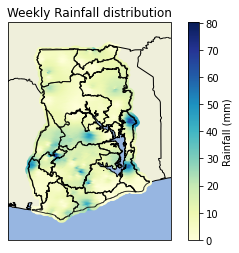

<IPython.core.display.Javascript object>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import *
import cartopy
import cartopy.crs as ccrs
from cartopy import feature as cf
import cartopy.io.shapereader as shpreader


TA_rr = np.genfromtxt(
    data_path / "rr_temp_rh_24_30May21.csv", delimiter=",", skip_header=1
)
lats = TA_rr[:, 0:1]
lons = TA_rr[:, 1:2]
rrs = TA_rr[:, 2:3]
tx = TA_rr[:, 3:4]
tn = TA_rr[:, 4:5]
rh = TA_rr[:, 5:6]

ax = plt.axes(projection=ccrs.PlateCarree())
# set the domain based on the lon lat
ax.set_extent([-4, 2, 4, 12], ccrs.PlateCarree())

# this add the countries borders and shapefile
ax.add_geometries(
    adm1_shapes, ccrs.PlateCarree(), edgecolor="black", facecolor="none", alpha=0.8
)  # add shapefile
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor="black")
ax.add_feature(cf.LAKES, edgecolor="black")

rrm = ax.scatter(x=lons, y=lats, c=rrs, cmap="YlGnBu")
ax.set(title="Weekly Rainfall distribution")
plt.colorbar(rrm, label="Rainfall (mm)", orientation="vertical")

# print(rr)

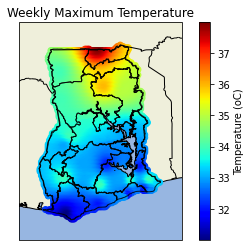

<IPython.core.display.Javascript object>

In [11]:

ax = plt.axes(projection=ccrs.PlateCarree())
#set the domain based on the lon lat 
ax.set_extent([-4, 2, 4, 12], ccrs.PlateCarree())

#this add the countries borders and shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.8) #add shapefile
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cf.LAKES, edgecolor='black')

txm = ax.scatter(x=lons,y=lats,c=tx, cmap="jet")
ax.set_title('Weekly Maximum Temperature')
plt.colorbar(txm, label="Temperature (oC)", orientation="vertical")


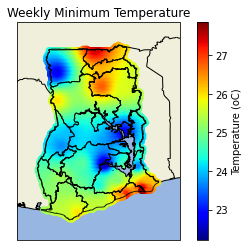

<IPython.core.display.Javascript object>

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
#set the domain based on the lon lat 
ax.set_extent([-4, 2, 4, 12], ccrs.PlateCarree())

#this add the countries borders and shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.8) #add shapefile
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cf.LAKES, edgecolor='black')

tnm = ax.scatter(x=lons,y=lats,c=tn, cmap="jet")
ax.set_title('Weekly Minimum Temperature')
plt.colorbar(tnm, label="Temperature (oC)", orientation="vertical")


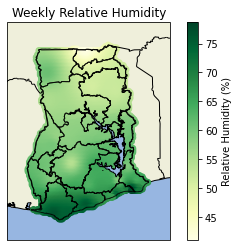

<IPython.core.display.Javascript object>

In [13]:
ax = plt.axes(projection=ccrs.PlateCarree())
#set the domain based on the lon lat 
ax.set_extent([-4, 2, 4, 12], ccrs.PlateCarree())

#this add the countries borders and shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.8) #add shapefile
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cf.LAKES, edgecolor='black')

rhm = ax.scatter(x=lons,y=lats,c=rh, cmap="YlGn")
ax.set_title('Weekly Relative Humidity')
plt.colorbar(rhm, label="Relative Humidity (%)", orientation="vertical")


·        The month of May is the major rainy season for the southern sector of Ghana and the beginning of the rainy season for the Northern sector.

·        From the figures, the weekly total rainfall showed that most areas within the country did not experience many rainfalls except few places within the middle sector and the west coast. The highest weekly rainfall total is around 80 mm. It implies most areas were dry considering this period of the season.

·        The weekly Average daily maximum temperatures were between 31 oC and 38 oC where the upper east region experienced the hottest period within the week. The night temperatures were observed to be warm over the upper east region and the eastern coast whiles The east portions of the middle sector and upper west were relatively cool.

·        However, low relative humidity of less than 45% occurred over the northern sector with the coast experiencing an appreciable moist within the atmosphere greater than 70%